# Quora Question Pair

# 1. Business Problem


## 1.1 Description


Quora is a place to gain and share knowledge—about anything. It’s a platform to ask questions and connect with people who contribute unique insights and quality answers. This empowers people to learn from each other and to better understand the world.

Over 100 million people visit Quora every month, so it's no surprise that many people ask similarly worded questions. Multiple questions with the same intent can cause seekers to spend more time finding the best answer to their question, and make writers feel they need to answer multiple versions of the same question. Quora values canonical questions because they provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.



#### Problem Statement --

- Identify which questions asked on Quora are duplicates of questions that have already been asked.<br>
- This could be useful to instantly provide answers to questions that have already been answered.<br>
- We are tasked with predicting whether a pair of questions are duplicates or not.<br>


#### Source - 

Source : https://www.kaggle.com/c/quora-question-pairs


## 1.2 Real world/Business Objectives and Constraints


a.The cost of a mis-classification can be very high.<br>
b.You would want a probability of a pair of questions to be duplicates so that you can choose any threshold of choice.<br>
c.No strict latency concerns.<br>
d.Interpretability is partially important.<br>

# 2. Machine Learning Probelm

## 2.1 Data Overview

- Data is in a file train.csv
- train.csv contains 6 columns : id , qid1 , qid2 , question1 , question2 , is_duplicate
- Size of train.csv - 58.7 MB
- Number of rows in Train.csv = 404,290

## 2.2 Mapping the real world problem to an ML problem


### a. Type of Machine Leaning Problem
It is a binary classification problem, for a given pair of questions we need to predict if they are duplicate or not.

### b. Performance Metric
Source: https://www.kaggle.com/c/quora-question-pairs#evaluation

Metric(s):

- log-loss : https://www.kaggle.com/wiki/LogarithmicLoss
- Binary Confusion Matrix


## 2.3 Train and Test Construction
We build train and test by randomly splitting in the ratio of 70:30 or 80:20 whatever we choose as we have sufficient points to work with.

# 3. Exploratory Data Analysis

## 3.1 Importing Library 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats



#library for advanced EDA

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
import re


#library for advanced EDA using NLP and Fuzzy 

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

from wordcloud import WordCloud, STOPWORDS

import urllib.request
from bs4 import BeautifulSoup


#library for text featuring

import spacy
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm

#library for ml models

import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

C:\Users\Vivek Kumar Goel\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
C:\Users\Vivek Kumar Goel\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


## 3.2 Reading Data and Basic Stats

In [2]:
#loading the data 

data = pd.read_csv("train.csv")
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [3]:
# column name 

data.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [4]:
# shape of data

row , col = data.shape
print(f"The number of row in data is {row} and column is {col}")

The number of row in data is 404290 and column is 6


In [5]:
# information of data 

data.describe()

,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614502,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


### Conclusion - 

- In question1 we have one null value and in question2 we have 2 null value . Remaining all the columns donot have any null value

## 3.3 Distribution of data points among output classes

- Number of duplicate(smilar) and non-duplicate(non similar) questions<br><br>
- '0' represent the question pair is not similar
- '1' represent the question pair is similar


In [7]:
data['is_duplicate'].value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

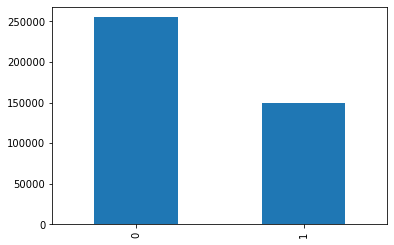

In [8]:
#plotting graph 
data['is_duplicate'].value_counts().plot.bar()

### Conclusion - 

- Here we can conclude approx 37% (149263) question pair are duplicate in our data set and 63% question pair are not duplicate .

## 3.4 Number of unique questions

In [9]:
#getting all the question ids 
q_ids = pd.Series(data['qid1'].tolist() + data['qid2'].tolist())

#getting unique question id 
unique_id = len(np.unique(q_ids))

print(f"Total number of unique questions are  : {unique_id}")

#checking the question appeared more than once 

qs_more_than_once = np.sum(q_ids.value_counts() > 1)

print(f"Number of questions that appeared more than once are : {qs_more_than_once} ({((qs_more_than_once / unique_id)*100)}%)")

#Checking max no. of time a question have appeared 

print(f"Maximun number of time a single question is appeared is : {max(q_ids.value_counts())}")

Total number of unique questions are  : 537933
Number of questions that appeared more than once are : 111780 (20.77953945937505%)
Maximun number of time a single question is appeared is : 157


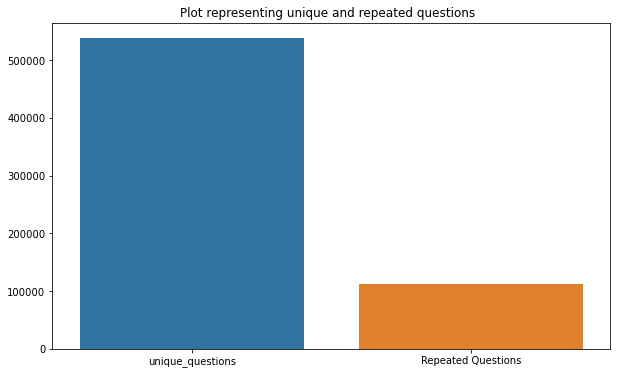

In [10]:
#plotting graph 

x = ["unique_questions" , "Repeated Questions"]
y =  [unique_id , qs_more_than_once]

plt.figure(figsize=(10, 6))
plt.title ("Plot representing unique and repeated questions  ")
sns.barplot(x,y)
plt.show()

In [11]:
#getting the most asked question 

q_vals = q_ids.value_counts()
print(q_vals)

2559      157
30782     120
4044      111
2561       88
14376      79
         ... 
75109       1
81254       1
85352       1
83305       1
168274      1
Length: 537933, dtype: int64


In [12]:
#here we observe that questions with q_ids 2559 , 30782 , 4044 are some questions that 
#are repeated multiple time

#seeing the question

print(f"Question at qid 2559 is : {data.loc[data['qid1']==2559]['question1'].head(1).values}")
print("\n")
print(f"Question at qid 30782 is : {data.loc[data['qid1']==30782]['question1'].head(1).values}")
print("\n")
print(f"Question at qid 4044 is : {data.loc[data['qid1']==4044]['question1'].head(1).values}")
print("\n")

Question at qid 2559 is : ['What are the best ways to lose weight?']


Question at qid 30782 is : []


Question at qid 4044 is : ['How can I lose weight quickly?']




## 3.5 Checking for Duplicates Pair

- we are checking rows having duplicate question pair or not 


In [13]:
duplicate_row = data[data.duplicated(['qid1', 'qid2' , 'is_duplicate'])]
print (f"Number of duplicate questions : {duplicate_row.shape[0]}")

Number of duplicate questions : 0


## 3.6 Plotting Questions based on there frequency 

Maximum number of times a single question is repeated: 157



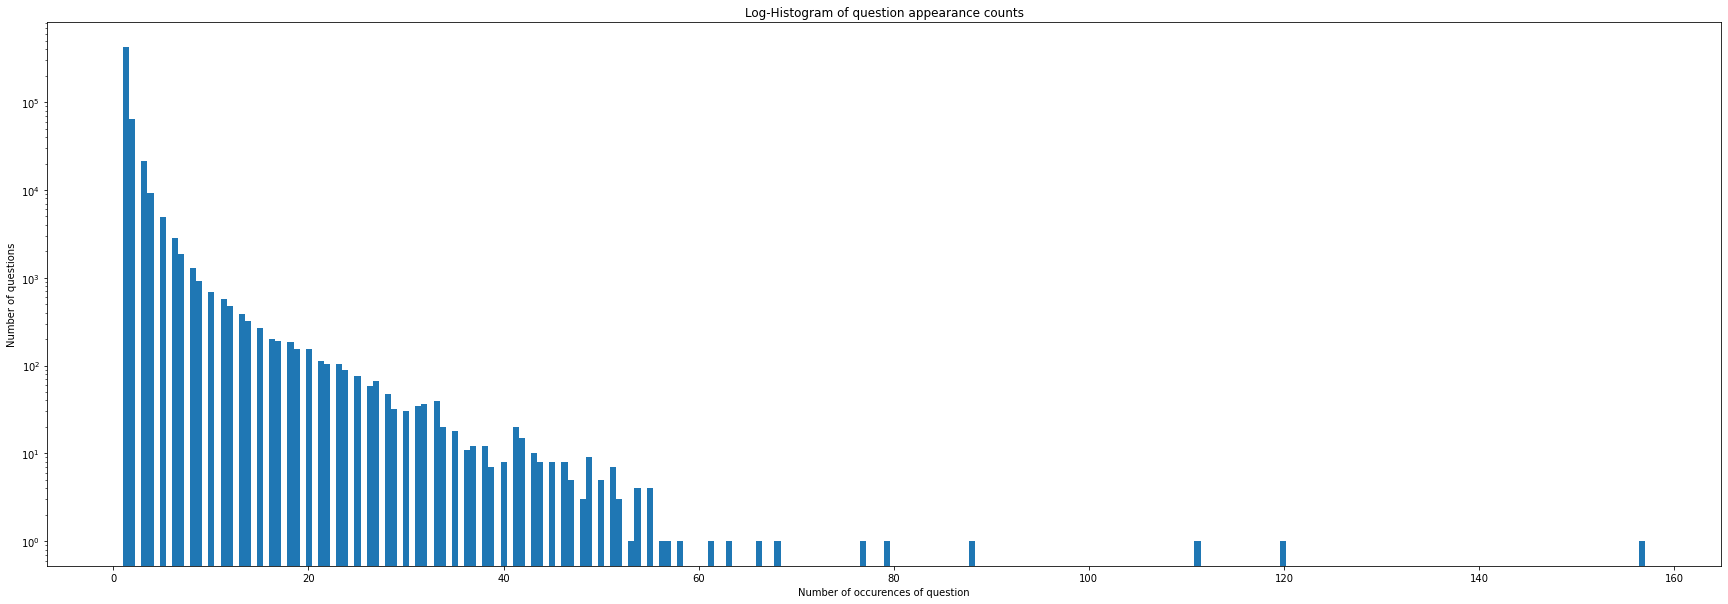

In [14]:
plt.figure(figsize=(30, 10))

plt.hist(q_ids.value_counts(), bins=250)

plt.yscale('log')

plt.title('Log-Histogram of question appearance counts')

plt.xlabel('Number of occurences of question')

plt.ylabel('Number of questions')

print (f'Maximum number of times a single question is repeated: {max(q_ids.value_counts())}\n') 

## 3.7 Checking and Removing Null Value 

In [15]:
data[data.isnull().any(1)]       # Checking if any value is null in our dataset

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


### Conclusion - 

As here we can see there are only 3 datapoint having null value so we can remove them .

In [16]:
data.dropna(inplace=True)   #Dropping Null Value
data[data.isnull().any(1)] 

,id,qid1,qid2,question1,question2,is_duplicate


## 3.8 Basic Feature Extraction

Let us now construct a few features like:

- freq_qid1 = Frequency of qid1's
- freq_qid2 = Frequency of qid2's
- q1len = Length of q1
- q2len = Length of q2
- q1_n_words = Number of words in Question 1
- q2_n_words = Number of words in Question 2
- word_Common = (Number of common unique words in Question 1 and Question 2)
- word_Total =(Total num of words in Question 1 + Total num of words in Question 2)
- word_share = (word_common)/(word_Total)
- freq_q1+freq_q2 = sum total of frequency of qid1 and qid2
- freq_q1-freq_q2 = absolute difference of frequency of qid1 and qid2

In [17]:
data['freq_qid1'] = data.groupby('qid1')['qid1'].transform('count')     #finding the frequency of Question1
data['freq_qid2'] = data.groupby('qid2')['qid2'].transform('count')     #finding the frequency of Question2
 
#---------------------------------------------------------------------------------------------------------------------------

data['q1len']=data['question1'].str.len()  # Finding length of Question 1
data['q2len']=data['question2'].str.len()  # Finding length of Question 2

#---------------------------------------------------------------------------------------------------------------------------

data['q1_n_words']=data['question1'].apply(lambda row : len(row.split()))   # Finding Number of Words in Question 1
data['q2_n_words']=data['question2'].apply(lambda row : len(row.split()))   # Finding Number of Words in Question 2


#---------------------------------------------------------------------------------------------------------------------------

# Fucntion to find the number of common words in Question 1 and Question 2

def common_word(row):
    '''
    We are converting both Question 1 and Question 2 to set (and also converting them to lower so that every word have same) and finding there intersection so that we can get common words
    Then we are simply finding the lenth of those common words
    '''
    return len((set(row['question1'].lower().split())).intersection(set(row['question2'].lower().split())))


# Creating New Column with Number of Common Words
data['word_Common'] = data.apply(common_word, axis=1)


#---------------------------------------------------------------------------------------------------------------------------


# Total Number of Distict words in both question1 and question2

def total_word(row):
    '''
    Coverting them to lower form then removing extra spaces and them removing the repeted words by converting them to sets 
    Then finding Length of Both the questions and adding them to find total words in both
    '''
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

# Getting total number of (unique) words in both question1 and question2
data['word_Total'] = data.apply(total_word, axis=1)


#-------------------------------------------------------------------------------------------------------------------------

def word_share(row):
    '''
    Here we are finding total number of shared word and dividing by total number of words [ (A intersection B)/A+B]
    '''
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return 1.0 * len(w1 & w2)/(len(w1) + len(w2))    # Finding the number of common words between question1 and question2 and dividing by total words between both of them
data['word_share'] = data.apply(word_share, axis=1)


#-------------------------------------------------------------------------------------------------------------------------

data['freq_q1+q2'] = data['freq_qid1']+data['freq_qid2']
data['freq_q1-q2'] = abs(data['freq_qid1']-data['freq_qid2'])

data.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10,23,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4,20,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4,24,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0,19,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2,20,0.100000,4,2


## 3.9 Analysis of some of the extracted features

### 3.9.1 Asking some basic question to our extracted features

In [18]:
print(f"Minimum length of the questions in question1 : {min(data['q1_n_words'])}")
print(f"Minimum length of the questions in question2 : {min(data['q2_n_words'])}")
print('\n')

print(f"Number of Questions with minimum length question1 :  {data[data['q1_n_words']== 1].shape[0]}")
print(f"Number of Questions with minimum length question2 : {data[data['q2_n_words']== 1].shape[0]}")
print('\n')

print(f"Maximum length of the questions in question1 :   {max(data['q1_n_words'])}")
print(f"Maximum length of the questions in question2 :   {max(data['q2_n_words'])}")
print('\n')

print(f"Number of Questions with minimum length question1 : {data[data['q1_n_words']>120].shape[0]}")
print(f"Number of Questions with minimum length question2 : {data[data['q2_n_words']> 230].shape[0]}")
print('\n')

print(f"Maximum number of Common word :  {max(data['word_Common'])}")
print(f"Maximum number of Shared Word : {max(data['word_share'])}")

Minimum length of the questions in question1 : 1
Minimum length of the questions in question2 : 1


Number of Questions with minimum length question1 :  70
Number of Questions with minimum length question2 : 26


Maximum length of the questions in question1 :   125
Maximum length of the questions in question2 :   237


Number of Questions with minimum length question1 : 1
Number of Questions with minimum length question2 : 13


Maximum number of Common word :  41
Maximum number of Shared Word : 0.5


### 3.9.2 Analysing column "word_share"

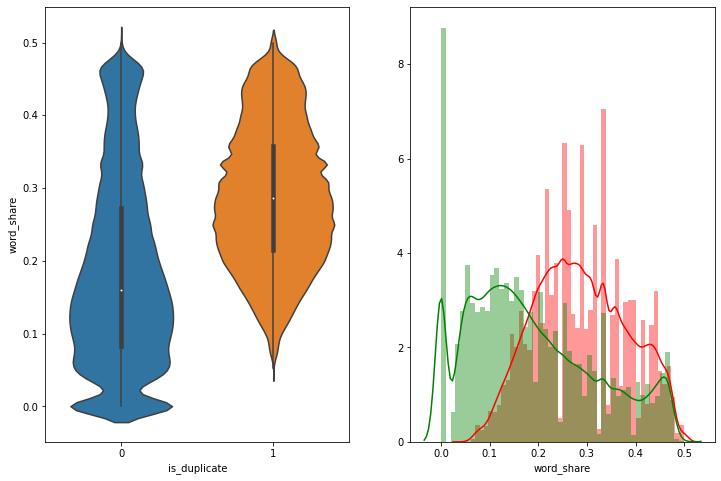

In [19]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_share', data = data[0:])

plt.subplot(1,2,2)
sns.distplot(data[data['is_duplicate'] == 1.0]['word_share'][0:] , label = "1", color = 'red')
sns.distplot(data[data['is_duplicate'] == 0.0]['word_share'][0:] , label = "0" , color = 'green' )
plt.show()

#### Conclusion- 

- The distributions for normalized word_share have some overlap on the far right-hand side, i.e., there are quite a lot of questions with high word similarity
- The average word share and Common no. of words of qid1 and qid2 is more when they are duplicate(Similar)

### 3.9.3  Analysing column "word_Common"

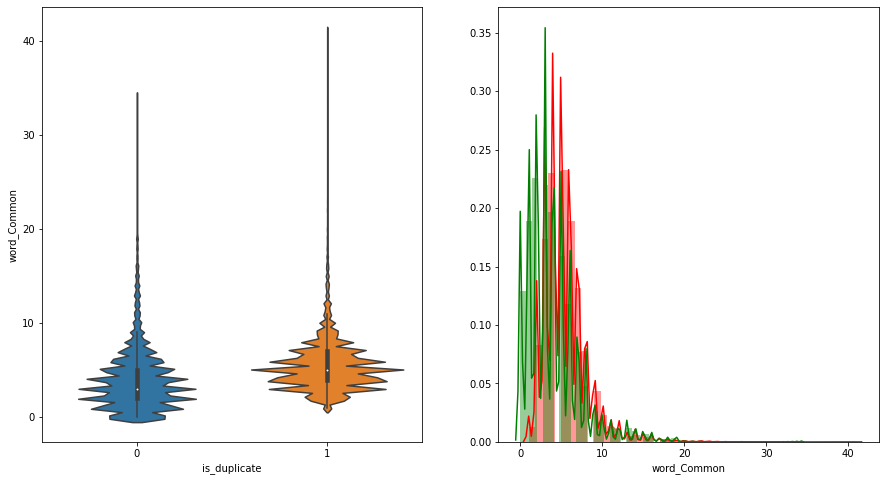

In [20]:
plt.figure(figsize=(15, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_Common', data = data[0:])

plt.subplot(1,2,2)
sns.distplot(data[data['is_duplicate'] == 1.0]['word_Common'][0:] , label = "1", color = 'red')
sns.distplot(data[data['is_duplicate'] == 0.0]['word_Common'][0:] , label = "0" , color = 'green' )
plt.show()

#### Conclusion - 

- The distributions of the word_Common feature in similar and non-similar questions are highly overlapping

### 3.9.4 Analysing column "word_Total"

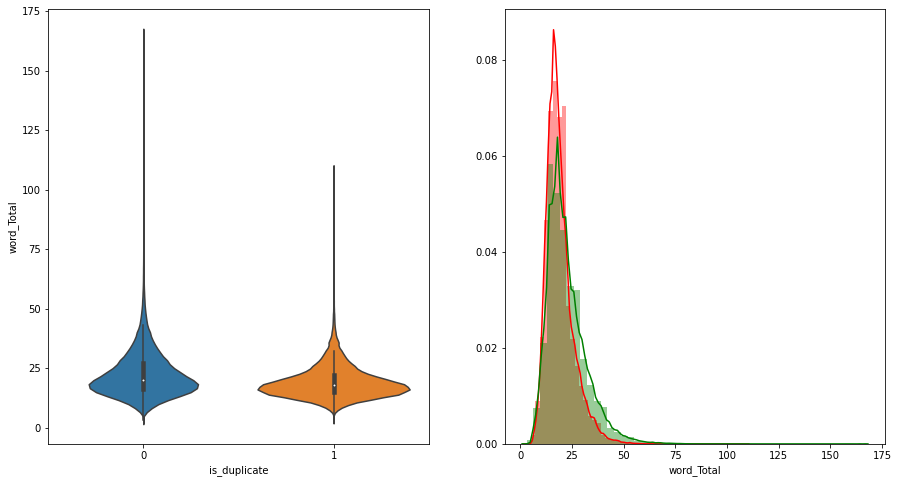

In [21]:
plt.figure(figsize=(15, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_Total', data = data[0:])

plt.subplot(1,2,2)
sns.distplot(data[data['is_duplicate'] == 1.0]['word_Total'][0:] , label = "1", color = 'red')
sns.distplot(data[data['is_duplicate'] == 0.0]['word_Total'][0:] , label = "0" , color = 'green' )
plt.show()

## 3.10 EDA: Advanced Feature Extraction

Preprocessing of Text :
- Removing html tags
- Removing Punctuations
- Performing stemming
- Removing Stopwords
- Expanding contractions etc.

### 3.10.1 Creating stopwords 

- Removing stopwords like how , whom , not , etc may be useful to differentiate between questions



In [22]:
# snow=SnowballStemmer('english')
snow=nltk.stem.SnowballStemmer('english')

# Creating custom stopwords

stopwords= set(['the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])



# function to perform "Stemming" and removing stopwords

def removeStopWord(word):
  token=word.split(" ")   ## coverting string to token (list of word) \\ like ["this","is","token"]
  removestop=[snow.stem(x) for x in token if x not in stopwords]   ##removing stopwords and also doing Stemming
  removed=" ".join(removestop)  ##joing back the list into sentence
  return removed

### 3.10.2 Replacing common words like 1000 to 1k , removing special character and stopwords   

In [23]:
def preprocess(x):
    x = str(x).lower()  # Lowering all text to covert all of them to there base form
    
    # Replacing commonly use words or numbers like 1,000 to 1k and 1,000,000 to 1m and currency symbol to there respective names and many other symbols to there name
    
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " is")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will").replace("@","at")
    
    # Renaming 1000 to 1k and 1000000 to 1m (the onces which may not be seperated with commans)
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    
    #Remove any special character like [= , ' ; "" ']
    
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    #Removing Stopwords And Doing Stemming
    x=removeStopWord(x)          
    
    return x

In [24]:
# Doing Pre-processing on both question1 and question2

data['cleanQ1']=data['question1'].apply(preprocess)
data['cleanQ2']=data['question2'].apply(preprocess)

### 3.10.3 How Preprocessing changed our Question Pair 


In [25]:
print('Questions 1 without pre-processing')
print(data['question1'][2])
print()
print('Questions 1 after pre-processing')
print(data['cleanQ1'][2])
print()
print('Questions 2 without pre-processing')
print(data['question2'][2])
print()
print('Questions 2 after pre-processing')
print(data['cleanQ2'][2])

Questions 1 without pre-processing
How can I increase the speed of my internet connection while using a VPN?

Questions 1 after pre-processing
how increas speed internet connect use vpn 

Questions 2 without pre-processing
How can Internet speed be increased by hacking through DNS?

Questions 2 after pre-processing
how internet speed increas hack dns 


### 3.10.4 Advanced EDA using NLP and Fuzzy Features

Definition:

- Token: You get a token by splitting sentence a space
- Stop_Word : stop words as per NLTK.
- Word : A token that is not a stop_word

Features :

- Simple Ratio : Measurement of edit distance (Minimum number of edits required to convert one sentence to other )

- Partial Ratio : How much accuratly a part of sentence match to other sentence ("Chennai Super Kings", "Super Kings")

- Token Sort Ratio : Tokenizing the string in question, sorting the tokens alphabetically, and then joining them back into a string

- Token Set Ratio : Tokenize both strings,split the tokens into two groups of intersection and remainder. We use those sets to build up a comparison string.

- Last_Word : Checks if last word is same in both Q1 and Q2

- First_Word : Checks if First word is same in both Q1 and Q2

- Length_diff : Finds the length diffrence between Q1 and Q2

- StopWord_Ratio : Number of stopwords in both Questions

- Token_Ratio : Number of tokens in both Questions

- Longest_Substr_ratio : Ratio of the Longest Substring that is found in between Q1 and Q2

In [26]:
#creating columns 

# data['Simple_Ratio']=data.apply(lambda x: fuzz.ratio(x['cleanQ1'],x['cleanQ2']) ,axis=1)

# data['Partial_Ratio']=data.apply(lambda x: fuzz.partial_ratio(x['cleanQ1'],x['cleanQ2']) ,axis=1)

# data['Token_Sort_Ratio']=data.apply(lambda x: fuzz.token_sort_ratio(x['cleanQ1'],x['cleanQ2']) ,axis=1)

# data['Token_Set_Ratio']=data.apply(lambda x: fuzz.token_set_ratio(x['cleanQ1'],x['cleanQ2']) ,axis=1)


# data['Last_Word']=data.apply(lambda x: int(x['question1'].split()[-1] == x['question2'].split()[-1]),axis=1)


# data['First_Word']=data.apply(lambda x: int(x['question1'].split()[0] == x['question2'].split()[0]),axis=1)


# data['Length_diff']=data.apply(lambda x: abs(len(x['question1'].split())-len(x['question2'].split())),axis=1)

In [27]:
data['Simple_Ratio']=data.apply(lambda x: fuzz.ratio(x['cleanQ1'],x['cleanQ2']) ,axis=1)

data['Partial_Ratio']=data.apply(lambda x: fuzz.partial_ratio(x['cleanQ1'],x['cleanQ2']) ,axis=1)

data['Token_Sort_Ratio']=data.apply(lambda x: fuzz.token_sort_ratio(x['cleanQ1'],x['cleanQ2']) ,axis=1)

data['Token_Set_Ratio']=data.apply(lambda x: fuzz.token_set_ratio(x['cleanQ1'],x['cleanQ2']) ,axis=1)


In [28]:
data['Last_Word']=data.apply(lambda x: int(x['question1'].split()[-1] == x['question2'].split()[-1]),axis=1)


data['First_Word']=data.apply(lambda x: int(x['question1'].split()[0] == x['question2'].split()[0]),axis=1)


data['Length_diff']=data.apply(lambda x: abs(len(x['question1'].split())-len(x['question2'].split())),axis=1)


In [29]:
#functions to find common_StopWord_Ratio , common_Token_Ratio , etc 

def common_StopWord_Ratio(q1,q2):
    q1_token=q1.split() # Splitting Words to make then tokens
    q2_token=q2.split()
    
    # We are takking out all the stopwords in both the Question and finding there intersection (Common stopwords)
    q1=set([word for word in q1_token if word in stopwords])
    q2=set([word for word in q2_token if word in stopwords])
    common=q1.intersection(q2)
    ratio=len(common)/len(set(q1_token))+len(set(q2_token))
    
    return ratio

def common_Token_Ratio(q1,q2):
    q1_token=q1.split()
    q2_token=q2.split()
    # We are takking out all the token in both the Question and finding there intersection (Common tokens)
    q1=set([x for x in q1_token if x not in stopwords])
    q2=set([x for x in q2_token if x not in stopwords])
    
    common=q1.intersection(q2)
    ratio=len(common)/len(set(q1_token))+len(set(q2_token))
    
    return ratio

def get_longest_substr_ratio(a, b):
    
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return round(len(strs[0]) / (min(len(a), len(b)) + 1),5)

def common_Characters(q1,q2):
    q1="".join(q1.split())
    q2="".join(q2.split())
    c=0
    d=dict(Counter(q1))
    for i in q2:
        if i in d and d[i]!=0:
            c+=1;d[i]-=1
    return c

In [30]:
#creating columns for above feature

# data['StopWord_Ratio']=data.apply(lambda x: common_StopWord_Ratio(x["question1"], x["question2"]), axis=1)


# data['Token_Ratio']=data.apply(lambda x: common_Token_Ratio(x["question1"], x["question2"]), axis=1)


# data['Longest_Substr_ratio']=data.apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)

###  3.10.5 Removing Uncleaned Question Column

In [31]:
# Deleting question1 from our data frame
del data['question1']

# Deleting question2 from our data frame
del data['question2']

# Printing dataset after deletion

data.head()

,id,qid1,qid2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,...,freq_q1-q2,cleanQ1,cleanQ2,Simple_Ratio,Partial_Ratio,Token_Sort_Ratio,Token_Set_Ratio,Last_Word,First_Word,Length_diff
0,0,1,2,0,1,1,66,57,14,12,...,0,what step step guid invest share market india,what step step guid invest share market,93,100,93,100,0,1,2
1,1,3,4,0,4,1,51,88,8,13,...,3,what stori kohinoor koh noor diamond,what would happen indian govern stole kohinoor...,67,85,65,91,0,1,5
2,2,5,6,0,1,1,73,59,14,10,...,0,how increas speed internet connect use vpn,how internet speed increas hack dns,41,42,73,85,0,1,4
3,3,7,8,0,1,1,50,65,11,9,...,0,whi mental lone how solv,find remaind when math 23 24 math divid 2...,31,42,26,31,0,0,2
4,4,9,10,0,3,1,76,39,13,7,...,2,which one dissolv water quik sugar salt meth...,which fish would surviv salt water,34,51,51,64,0,1,6


### 3.10.6 Analyzing Extracted Feature

In [32]:
# Creating two dataframe of both duplicate and non duplicate and then extacting all the text and saving then in text file
data_duplicate = data[data['is_duplicate'] == 1]
datap_nonduplicate = data[data['is_duplicate'] == 0]

# Converting 2d array of q1 and q2 and flatten the array: like {{1,2},{3,4}} to {1,2,3,4}
p = np.dstack([data_duplicate['cleanQ1'], data_duplicate['cleanQ2']]).flatten()
n = np.dstack([datap_nonduplicate["cleanQ1"], datap_nonduplicate["cleanQ2"]]).flatten()

print ("Number of data points in class 1 (duplicate pairs) :",len(p))
print ("Number of data points in class 0 (non duplicate pairs) :",len(n))


Number of data points in class 1 (duplicate pairs) : 298526
Number of data points in class 0 (non duplicate pairs) : 510048


### 3.10.7 Analyzing each features

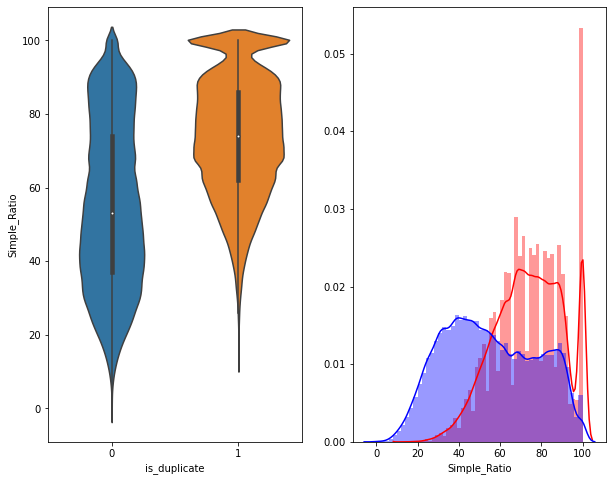

In [33]:
# Distribution of the Simple_Ratio
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'Simple_Ratio', data = data[0:] , )

plt.subplot(1,2,2)
sns.distplot(data[data['is_duplicate'] == 1.0]['Simple_Ratio'][0:] , label = "1", color = 'red')
sns.distplot(data[data['is_duplicate'] == 0.0]['Simple_Ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

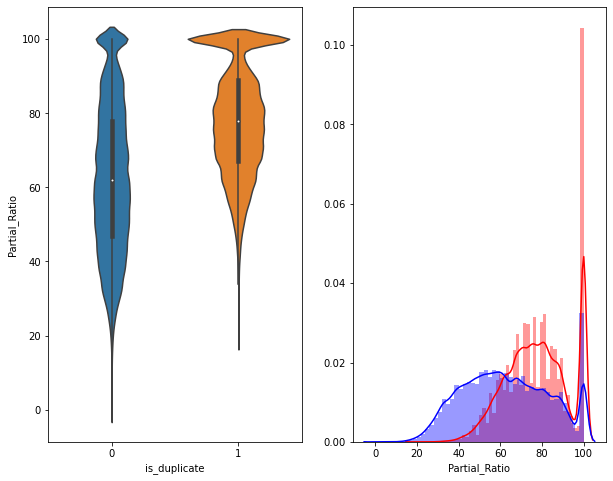

In [34]:
# Distribution of the Partial_Ratio
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'Partial_Ratio', data = data[0:] , )

plt.subplot(1,2,2)
sns.distplot(data[data['is_duplicate'] == 1.0]['Partial_Ratio'][0:] , label = "1", color = 'red')
sns.distplot(data[data['is_duplicate'] == 0.0]['Partial_Ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

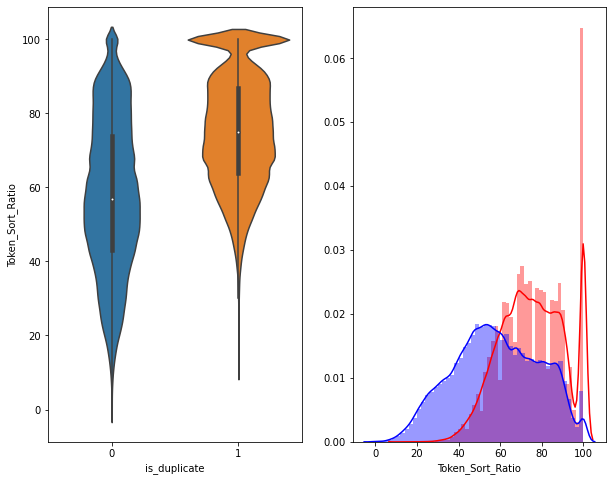

In [35]:
# Distribution of the Token_Sort_Ratio
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'Token_Sort_Ratio', data = data[0:] , )

plt.subplot(1,2,2)
sns.distplot(data[data['is_duplicate'] == 1.0]['Token_Sort_Ratio'][0:] , label = "1", color = 'red')
sns.distplot(data[data['is_duplicate'] == 0.0]['Token_Sort_Ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

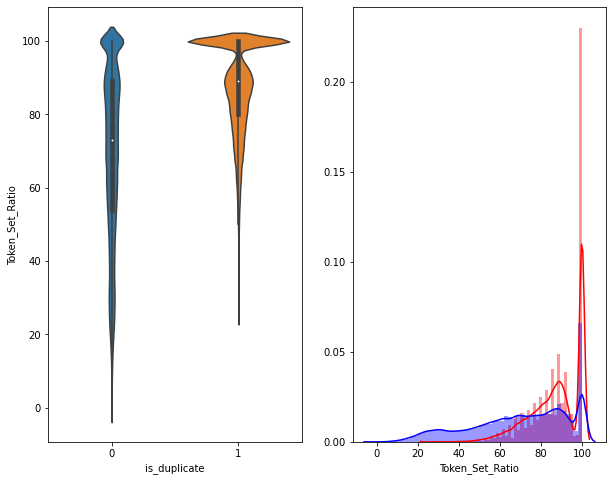

In [36]:
# Distribution of the Token_Set_Ratio
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'Token_Set_Ratio', data = data[0:] , )

plt.subplot(1,2,2)
sns.distplot(data[data['is_duplicate'] == 1.0]['Token_Set_Ratio'][0:] , label = "1", color = 'red')
sns.distplot(data[data['is_duplicate'] == 0.0]['Token_Set_Ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

In [37]:
data.columns


Index(['id', 'qid1', 'qid2', 'is_duplicate', 'freq_qid1', 'freq_qid2', 'q1len',
       'q2len', 'q1_n_words', 'q2_n_words', 'word_Common', 'word_Total',
       'word_share', 'freq_q1+q2', 'freq_q1-q2', 'cleanQ1', 'cleanQ2',
       'Simple_Ratio', 'Partial_Ratio', 'Token_Sort_Ratio', 'Token_Set_Ratio',
       'Last_Word', 'First_Word', 'Length_diff'],
      dtype='object')

In [38]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
datap_subsampled = data[0:5000]
X = MinMaxScaler().fit_transform(datap_subsampled[['Simple_Ratio', 'Partial_Ratio', 'Token_Sort_Ratio', 'Token_Set_Ratio','q1len', 'q2len', 'q1_n_words','q2_n_words', 'word_Common', 'word_Total', 'word_share','Last_Word', 'First_Word', 'Length_diff']])
y = datap_subsampled['is_duplicate'].values

In [39]:
tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.054s...
[t-SNE] Computed neighbors for 5000 samples in 0.698s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.084912
[t-SNE] Computed conditional probabilities in 0.374s
[t-SNE] Iteration 50: error = 80.9654007, gradient norm = 0.0471294 (50 iterations in 3.177s)
[t-SNE] Iteration 100: error = 71.2368469, gradient norm = 0.0100794 (50 iterations in 2.471s)
[t-SNE] Iteration 150: error = 69.7338333, gradient norm = 0.0047685 (50 iterations in 2.427s)
[t-SNE] Iteration 200: error = 69.0948105, gradient norm = 0.0042093 (50 iterations in 2.472s)
[t-SNE] Iteration 250: error = 68.7337723, gradient norm = 0.0029269

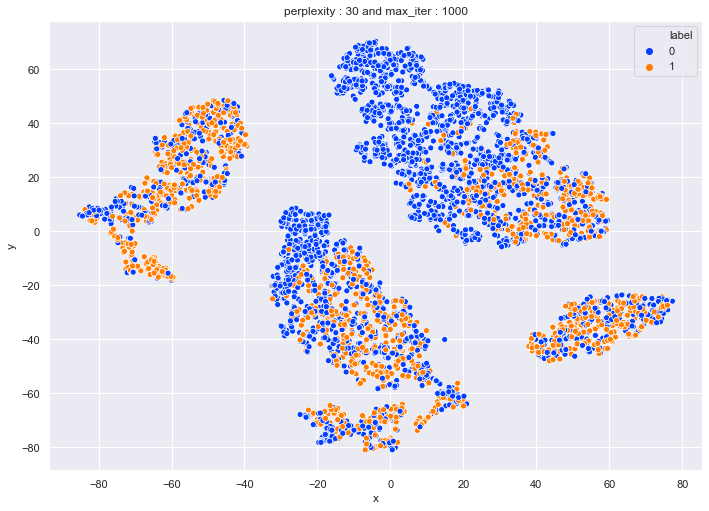

In [40]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

palette = sns.color_palette("bright", 2)
# draw the plot in appropriate place in the grid
sns.scatterplot(data=df, x='x', y='y', hue='label',legend='full', palette=palette)
plt.title("perplexity : {} and max_iter : {}".format(30, 1000))
plt.show()

In [41]:
# data1=data[['cleanQ1','cleanQ2','is_duplicate']]
# data1['cleanQ1'] = data['cleanQ1'].apply(lambda x: str(x))
# data1['cleanQ2'] = data['cleanQ2'].apply(lambda x: str(x))
# data1.head()

In [42]:
# # merging questions of both Q1 and Q2 to a single list in which first 404287 index will be of question 1 and then rest of question 2
# questions = list(data1['cleanQ1']) + list(data1['cleanQ2'])  # len(questions): 808574  [404287 of q1 and 404287 of q2]

# tfidf = TfidfVectorizer() #  Convert a collection of raw documents to a matrix of TF-Idata features

# tfidf.fit_transform(questions)  # Converting out text to a matrix of TF-Idata features

# # mapping our feature_names with threre resptive tf-idata score  ( dict key:word and value:tf-idata score )
# word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_)) 

In [43]:
# # Plotting Key Value Pair
# wrd=list(word2tfidf.keys())[::-1][:10]   # finding keys of dict and then reversing them to get last 10 keys
# for i in wrd:
#     print(i,word2tfidf[i])

In [45]:
data=data.drop(['qid1', 'qid2','cleanQ1', 'cleanQ2'],axis=1)

In [46]:
data=data.drop(['id'],axis=1)
data.head()

,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,Simple_Ratio,Partial_Ratio,Token_Sort_Ratio,Token_Set_Ratio,Last_Word,First_Word,Length_diff
0,0,1,1,66,57,14,12,10,23,0.434783,2,0,93,100,93,100,0,1,2
1,0,4,1,51,88,8,13,4,20,0.200000,5,3,67,85,65,91,0,1,5
2,0,1,1,73,59,14,10,4,24,0.166667,2,0,41,42,73,85,0,1,4
3,0,1,1,50,65,11,9,0,19,0.000000,2,0,31,42,26,31,0,0,2
4,0,3,1,76,39,13,7,2,20,0.100000,4,2,34,51,51,64,0,1,6


### ML model


In [47]:
y_true=data['is_duplicate']
y_true.head()

0    0
1    0
2    0
3    0
4    0
Name: is_duplicate, dtype: int64

In [48]:
data.drop(['is_duplicate'], axis=1, inplace=True)


In [49]:
data.head()

,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,Simple_Ratio,Partial_Ratio,Token_Sort_Ratio,Token_Set_Ratio,Last_Word,First_Word,Length_diff
0,1,1,66,57,14,12,10,23,0.434783,2,0,93,100,93,100,0,1,2
1,4,1,51,88,8,13,4,20,0.200000,5,3,67,85,65,91,0,1,5
2,1,1,73,59,14,10,4,24,0.166667,2,0,41,42,73,85,0,1,4
3,1,1,50,65,11,9,0,19,0.000000,2,0,31,42,26,31,0,0,2
4,3,1,76,39,13,7,2,20,0.100000,4,2,34,51,51,64,0,1,6


In [50]:
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(data)

In [51]:
data.head()

,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,Simple_Ratio,Partial_Ratio,Token_Sort_Ratio,Token_Set_Ratio,Last_Word,First_Word,Length_diff
0,1,1,66,57,14,12,10,23,0.434783,2,0,93,100,93,100,0,1,2
1,4,1,51,88,8,13,4,20,0.200000,5,3,67,85,65,91,0,1,5
2,1,1,73,59,14,10,4,24,0.166667,2,0,41,42,73,85,0,1,4
3,1,1,50,65,11,9,0,19,0.000000,2,0,31,42,26,31,0,0,2
4,3,1,76,39,13,7,2,20,0.100000,4,2,34,51,51,64,0,1,6


In [52]:
X_train,X_test, y_train, y_test = train_test_split(scaled, y_true, stratify=y_true, test_size=0.3)

In [53]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (283000, 18)
Number of data points in test data : (121287, 18)


In [54]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6307985865724381 Class 1:  0.36920141342756185
---------- Distribution of output variable in train data ----------
Class 0:  0.3691986775169639 Class 1:  0.3691986775169639


In [55]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

In [56]:
#Building a random model (Finding worst-case log-loss)

Log loss on Test Data using Random Model 0.887417930560734


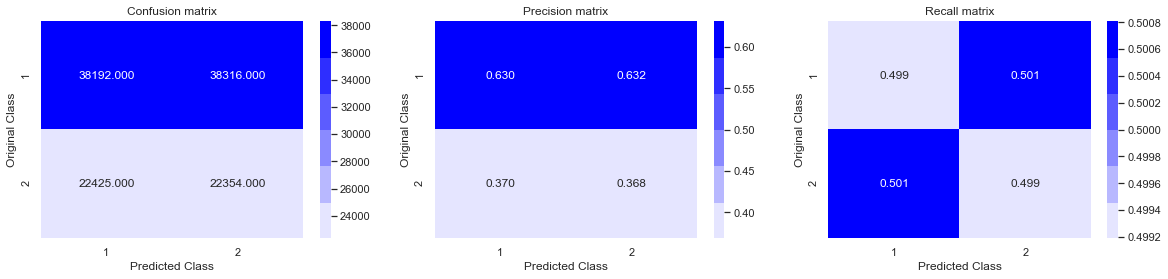

In [57]:
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

In [58]:
#Logistic Regression with hyperparameter tuning

For values of alpha =  1e-05 The log loss is: 0.43576104259800197
For values of alpha =  0.0001 The log loss is: 0.43143513522182303
For values of alpha =  0.001 The log loss is: 0.4303481058710582
For values of alpha =  0.01 The log loss is: 0.44236039209422784
For values of alpha =  0.1 The log loss is: 0.47421670227132806
For values of alpha =  1 The log loss is: 0.5012774966204472
For values of alpha =  10 The log loss is: 0.5115099784697646


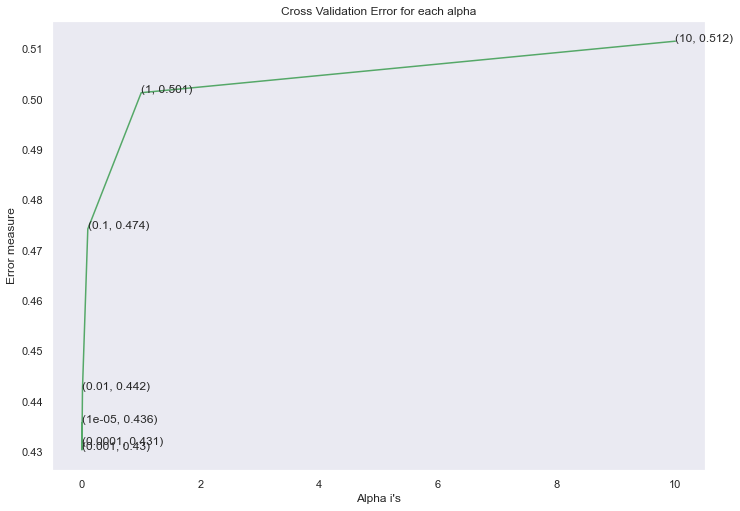

For values of best alpha =  0.001 The train log loss is: 0.42997047302466035
For values of best alpha =  0.001 The test log loss is: 0.4303481058710582
Total number of data points : 121287


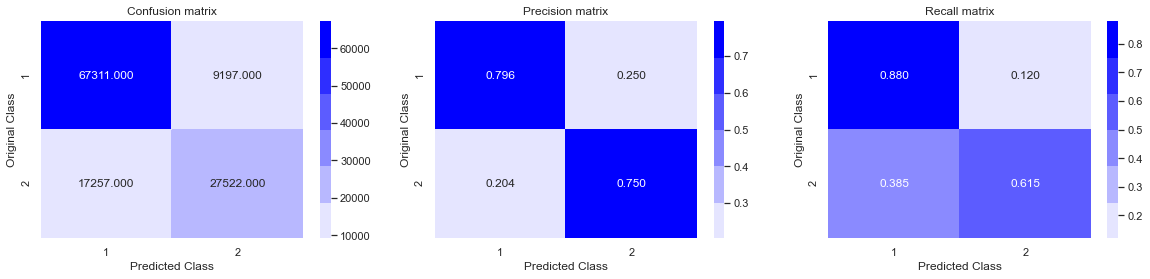

In [59]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.



log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

### Linear SVM with hyperparameter tuning

For values of alpha =  1e-05 The log loss is: 0.46457225187938556
For values of alpha =  0.0001 The log loss is: 0.4412620902969132
For values of alpha =  0.001 The log loss is: 0.4415049126049381
For values of alpha =  0.01 The log loss is: 0.44866370649008647
For values of alpha =  0.1 The log loss is: 0.5244023412742739
For values of alpha =  1 The log loss is: 0.6585278256453735
For values of alpha =  10 The log loss is: 0.6585278256453736


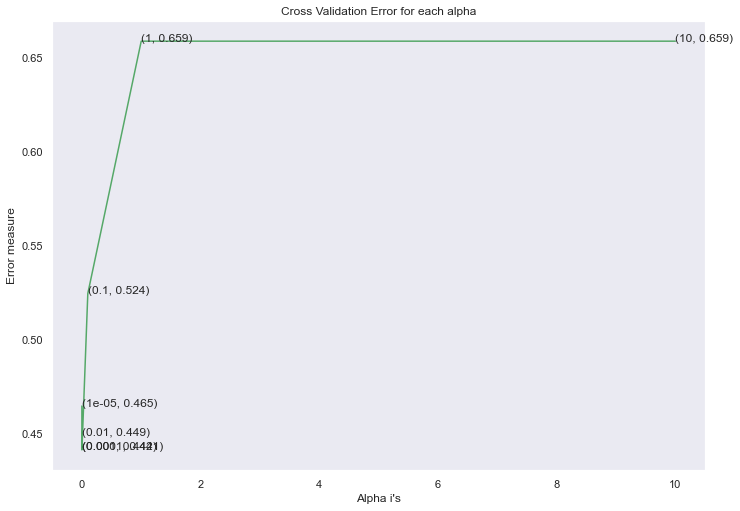

For values of best alpha =  0.0001 The train log loss is: 0.4409166229628016
For values of best alpha =  0.0001 The test log loss is: 0.4412620902969132
Total number of data points : 121287


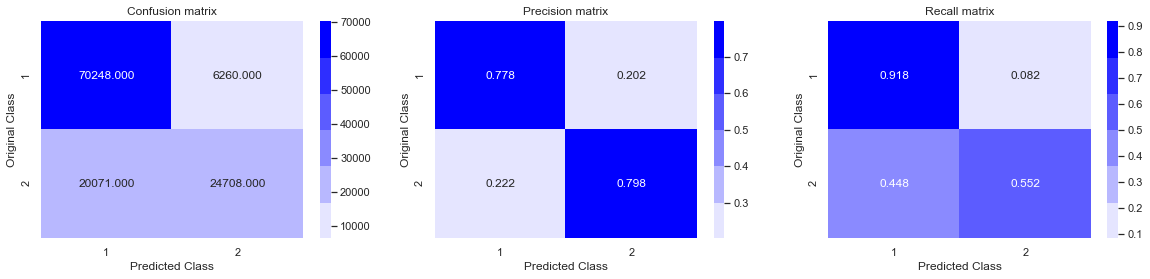

In [60]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)